<a href="https://colab.research.google.com/github/Kaustubh-98/Data_Analysis_Project/blob/sales_python_project/Regional_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

project objective

Company's Sales data from 2014-18 to identify key revenue and profit drivers across products, channels and regions, uncover seasonal trends and outliers and align performance against budget. Use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced market risk.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sheets=pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [11]:
#assign dataframe to each sheet
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_products=sheets['Products']
df_budget=sheets['2017 Budgets']

In [12]:
print(f"df_sales shape:",(df_sales.shape))
print(f"df_customers shape:",(df_customers.shape))
print(f"df_regions:",(df_regions.shape))
print(f"df_state_reg shape:",(df_state_reg.shape))
print(f"df_products shape:",(df_products.shape))
print(f"df_budget shape:",(df_budget.shape))


df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_regions: (994, 15)
df_state_reg shape: (49, 3)
df_products shape: (30, 2)
df_budget shape: (30, 2)


In [13]:
new_header=df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg=df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


Check for Null Values

In [14]:
df_customers.isnull().sum()
df_regions.isnull().sum()
df_state_reg.isnull().sum()
df_products.isnull().sum()
df_budget.isnull().sum()

,0
Product Name,0
2017 Budgets,0


Data Cleaning and Wrangling

In [15]:
#Merge with Customers
df=df_sales.merge(df_customers, how='left', left_on='Customer Name Index', right_on='Customer Index')
df.columns.values

array(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index',
       'Customer Names'], dtype=object)

In [16]:
#Merge with Products
df=df.merge(df_products, how='left', left_on='Product Description Index', right_on='Index')

In [17]:
#Merge With Regions
df=df.merge(df_regions, how='left', left_on='Delivery Region Index', right_on='id')

In [18]:
print(df.columns.tolist())

['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone']


In [19]:
#Merge with StateRegion
df=df.merge(df_state_reg[['State Code','Region']], how='left',left_on='state_code', right_on='State Code')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [20]:
df=df.merge(df_budget,how='left',on='Product Name')

In [21]:
#id_x
#id_y
#name_y
#county_y
#state_code_y
#state_y
#type_y
#latitude_y
#longitude_y
#area_code_y
#population_y
#households_y
#median_income_y
#land_area_y
#water_area_y
#time_zone_y
#State_Code_x
#Region_x
#State_Code_y
#Region_y
#Clean up redundant Columns
cols_to_drop=['id_x','id_y','name_y','county_y','state_code_y','state_y','type_y','latitude_y','longitude_y','area_code_y','population_y',
              'households_y','median_income_y','land_area_y','water_area_y','time_zone_y','State_Code_x','State_Code_y','Region_y']
df=df.drop(columns=cols_to_drop,errors='ignore')

In [22]:
cols_to_drop=['state_code_x','State_Code_x','State_Code_y']
df=df.drop(columns=cols_to_drop,errors='ignore')

In [23]:
cols_to_drop=['State Code_x','State Code_y']
df=df.drop(columns=cols_to_drop,errors='ignore')

In [24]:
#convert all columns to lowercase for consistency and easier access
df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer index',
       'customer names', 'index', 'product name', 'id', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'state code', 'region',
       '2017 budgets'], dtype=object)

In [25]:
#KEEP THE IMPORTANT COLUMNS AND REMOVE COLUMNS THAT ARE UNNCESSARY
cols_to_keep=['ordernumber','orderdate','customer names','channel','product name','order quantity',
              'unit price','line total','total unit cost','state_code','county','state','region','latitude','longitude','2017 budgets']


In [26]:
df=df[cols_to_keep]

In [27]:
#This is the main data to work on
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [28]:
df=df.rename(columns={'ordernumber': 'order_number',
                      'orderdate':'order_date',
                      'customer names':'customer_names',
                      'product name':'product_names',
                      'order quantity':'order_quantity',
                      'unit price':'unit_price',
                      'line total':'revenue',
                      'total unit cost':'total_unit_cost',
                      'state_code':'state',
                      'state':'state_name',
                      'latitute':'lat',
                      'longitude':'long',
                      '2017 budgets':'budget'})

In [29]:
#Mark all non 2017 order date with Nill Budgets
df.loc[df['order_date'].dt.year!=2017,'budget']=pd.NA

#line total revenue
df[['order_date','product_names','revenue','budget']].head(5)


,order_date,product_names,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [30]:
#create a df of only 2017 instance
df_2017=df[df['order_date'].dt.year==2017]

In [31]:
df = df.loc[:, ~df.columns.duplicated()]
df.columns.to_list()

['order_number',
 'order_date',
 'customer_names',
 'channel',
 'product_names',
 'order_quantity',
 'unit_price',
 'revenue',
 'total_unit_cost',
 'state',
 'county',
 'state_name',
 'region',
 'latitude',
 'long',
 'budget']

FEATURE ENGINEERING

In [32]:
df['total_cost']=df['total_unit_cost']*df['order_quantity']
df['total_profit']=df['revenue']-df['total_cost']
df.head(5)

,order_number,order_date,customer_names,channel,product_names,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,latitude,long,budget,total_cost,total_profit
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040


In [33]:
df['profit_pct']=df['total_profit']/df['revenue']*100

EXPLORATORY DATA ANALYSIS (EDA)

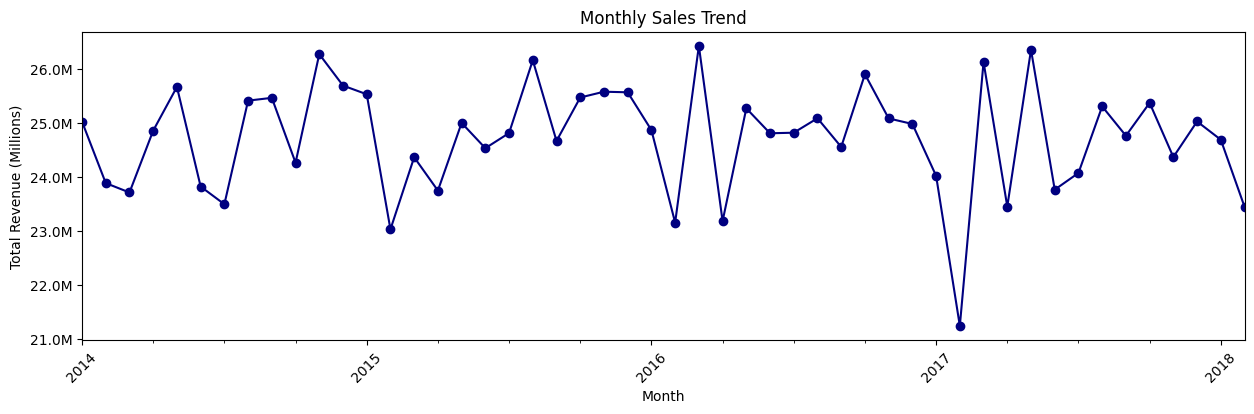

In [34]:
df['order_month']=df['order_date'].dt.to_period('M')
monthly_sales=df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o',color='navy')
from matplotlib.ticker import FuncFormatter
formatter=FuncFormatter(lambda x,pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)
plt.tight_layout
plt.show()

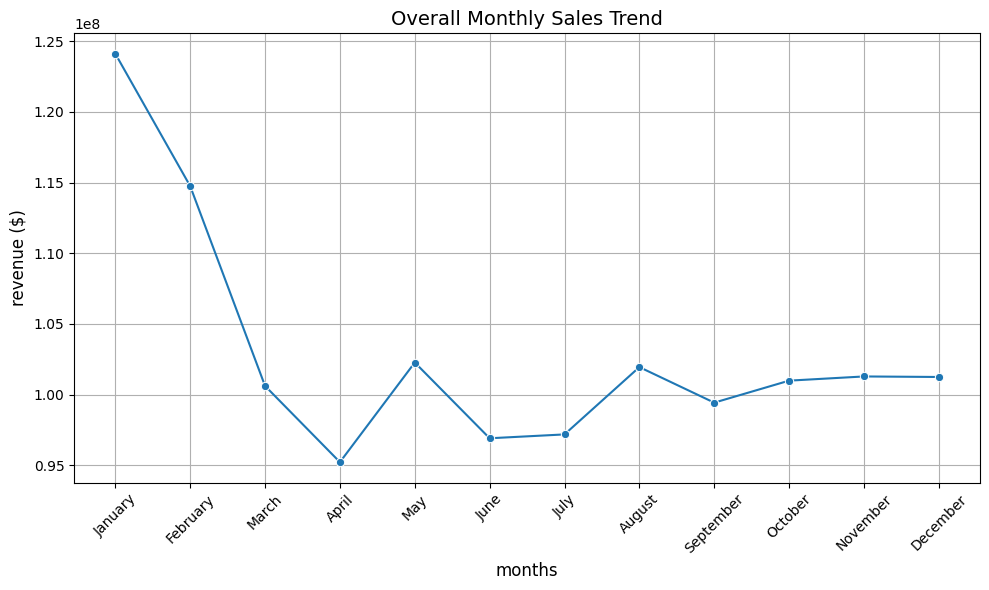

In [35]:
#look at sales distribution on monthly basis
#convert order_date to datetime
df['order_date']=pd.to_datetime(df['order_date'])

#extract month name
df['month']=df['order_date'].dt.strftime('%B')

monthly_trends=df.groupby('month')['revenue'].sum().reset_index()
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_trends['month']=pd.Categorical(monthly_trends['month'],categories=month_order,ordered=True)

#Create Visualization
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trends,x='month',y='revenue',marker='o')
plt.title('Overall Monthly Sales Trend', fontsize=14)
plt.xlabel('months', fontsize=12)
plt.ylabel('revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [36]:
#Remove anomalies from Jan-18 to Feb-18
df['order_date']=pd.to_datetime(df['order_date'])
df_new=df[~((df['order_date'].dt.year==2018)& (df['order_date'].dt.month.isin([1,2])))]

/tmp/ipython-input-4099848382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month']=df_new['order_date'].dt.strftime('%B')


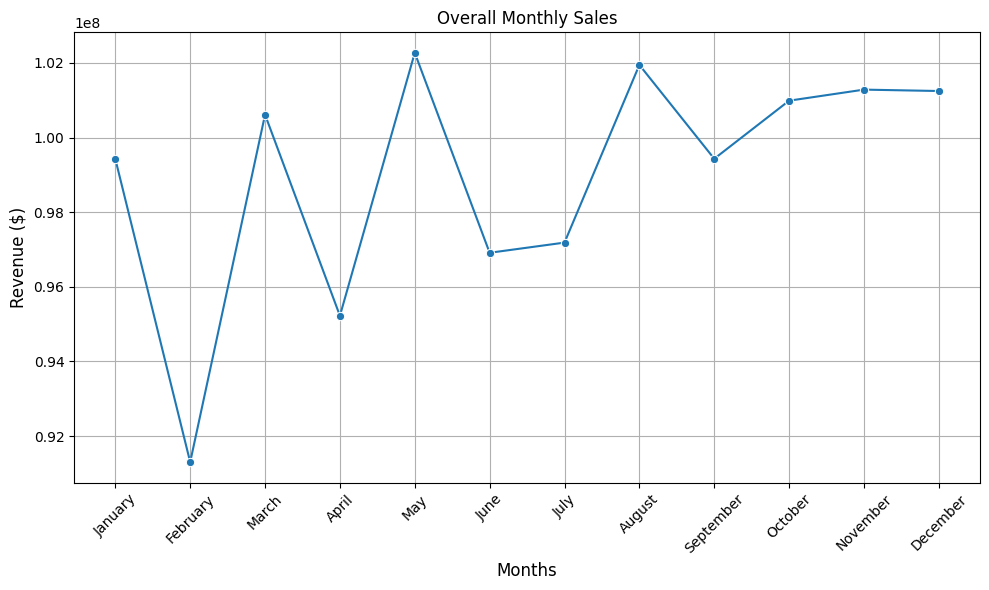

In [37]:
#extract month name for grouping
df_new['month']=df_new['order_date'].dt.strftime('%B')
#aggregate revenue by month across all years
monthly_trend=df_new.groupby('month')['revenue'].sum().reset_index()

#Sort Months in Calendar years
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_trend['month']=pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend=monthly_trend.sort_values('month')

#Creating Line Chart
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trend,x='month',y='revenue',marker='o')
plt.title('Overall Monthly Sales')
plt.xlabel('Months',fontsize=12)
plt.ylabel('Revenue ($)',fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



TOP 10 PRODUCTS

In [38]:
product_revenue=df_new.groupby('product_names')['revenue'].sum().reset_index()

#top 10 products by revenue
top_10_products=product_revenue.sort_values('revenue',ascending=False).head(10)
#print data for chart
labels=top_10_products['product_names'].to_list()
data=top_10_products['revenue'].to_list()
print(f"Labels for chart: ",labels)
print(f"Data for chart:", data)


Labels for chart:  ['Product 26', 'Product 25', 'Product 13', 'Product 14', 'Product 5', 'Product 15', 'Product 2', 'Product 4', 'Product 1', 'Product 3']
Data for chart: [112454990.9, 105715762.4, 75190019.7, 72516666.10000001, 68032711.2, 64933726.7, 54976803.1, 54558669.5, 53678832.2, 49935227.300000004]


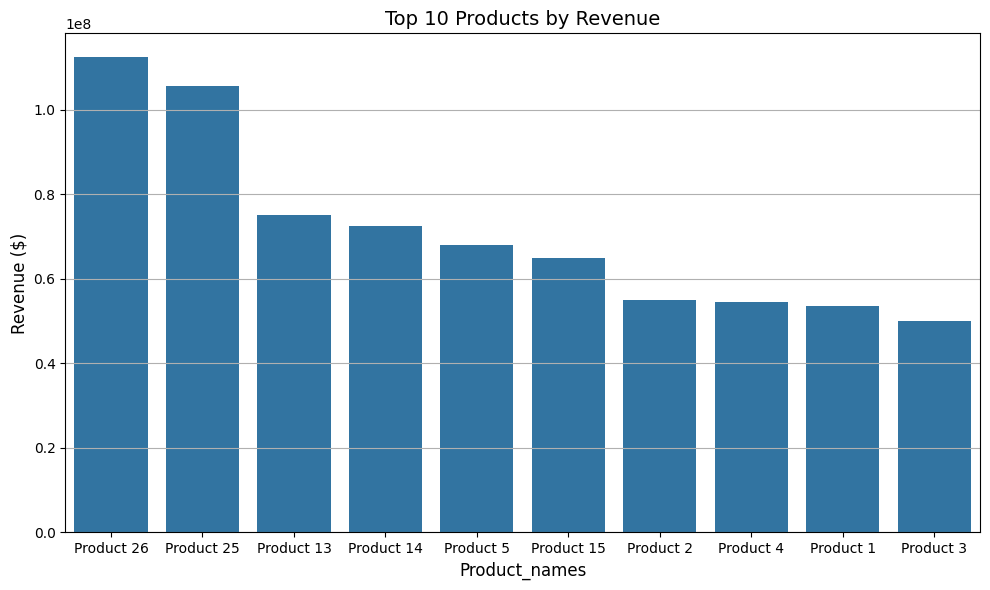

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_products,x='product_names',y='revenue')
plt.title("Top 10 Products by Revenue", fontsize=14)
plt.xlabel("Product_names",fontsize=12)
plt.ylabel("Revenue ($)",fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



Channel Sales Pie Chart

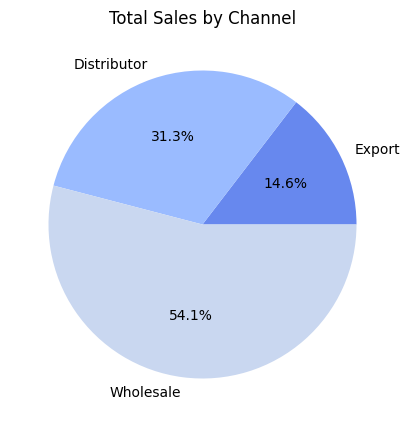

In [40]:
chan_sales=df_new.groupby('channel')['revenue'].sum().sort_values(ascending=True)
plt.figure(figsize=(5,5))
plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("coolwarm")
)
plt.title("Total Sales by Channel")
plt.show()

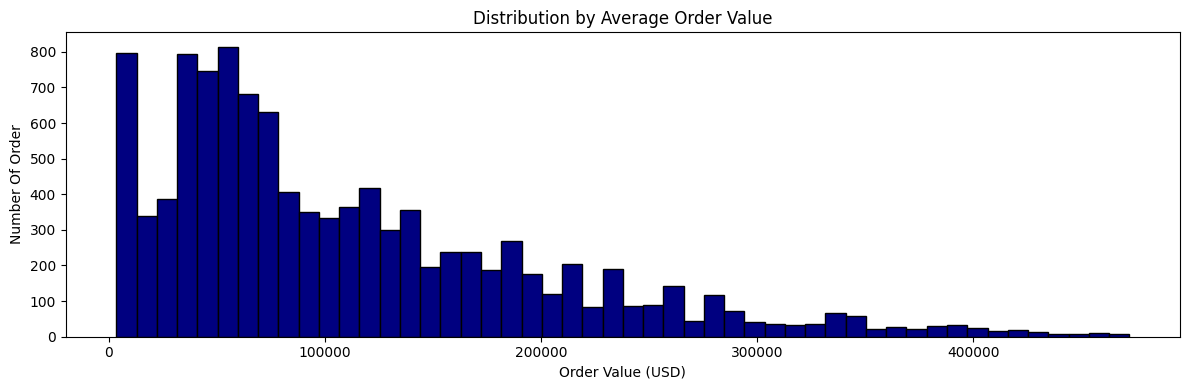

In [41]:
#average_order_values
aov=df_new.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12,4))
plt.hist(
    aov,
    bins=50,
    color='navy',
    edgecolor='black'
)
plt.title("Distribution by Average Order Value")
plt.xlabel("Order Value (USD)")
plt.ylabel("Number Of Order")
plt.tight_layout()
plt.show()

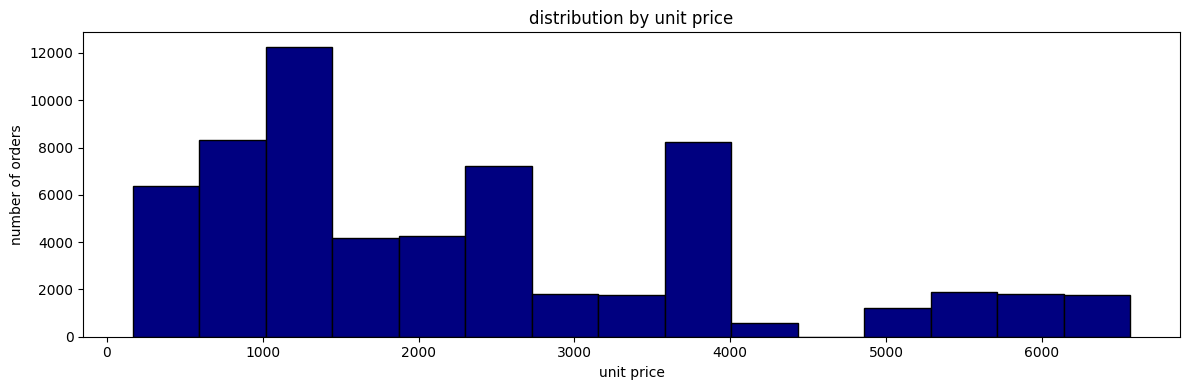

In [42]:
#UNIT PRICE DISTRIBUTION
plt.figure(figsize=(12,4))
plt.hist(
    df_new['unit_price'],
    bins=15,
    color='navy',
    edgecolor='black'
)

plt.title('distribution by unit price')
plt.xlabel('unit price')
plt.ylabel('number of orders')
plt.tight_layout()
plt.show()

TOP 10 STATE BY REVENUE

/tmp/ipython-input-3142186329.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot1=sns.barplot(data=top_10_revenue,x='state_name',y='revenue',palette='tab10',ax=ax1)
/tmp/ipython-input-3142186329.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot2=sns.barplot(data=top_10_orders,x='state_name',y='order_count',palette='tab10',ax=ax2)


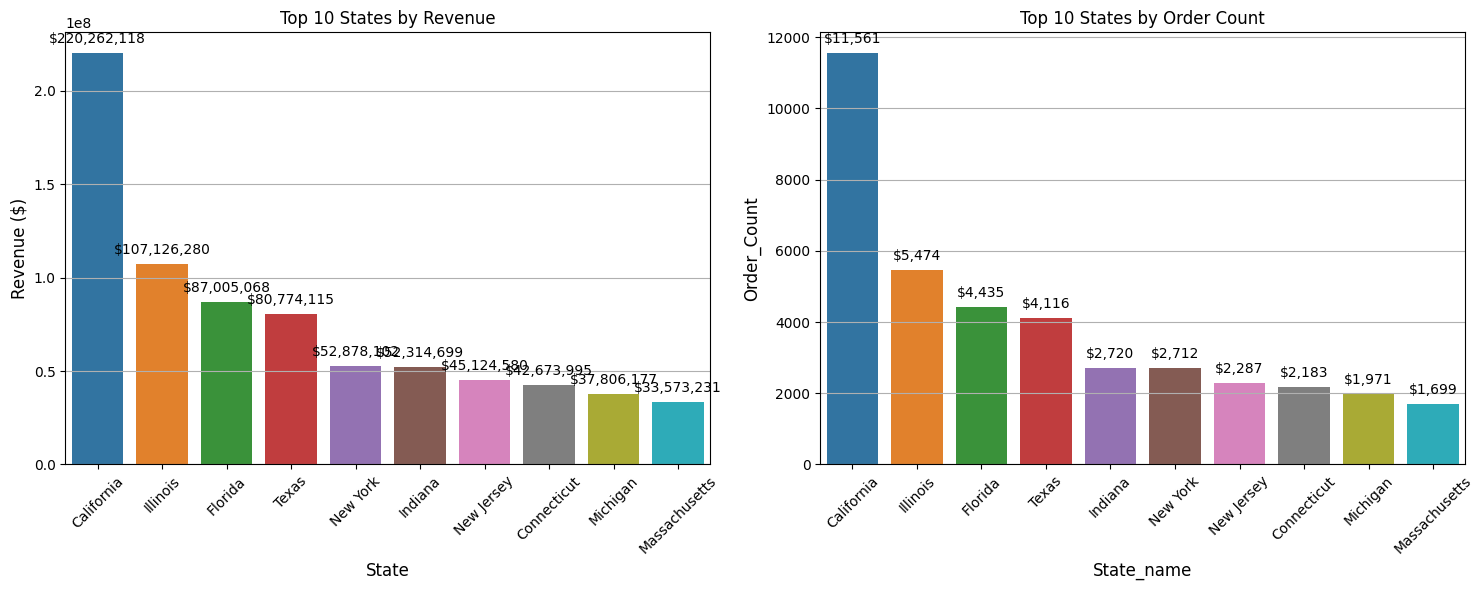

In [49]:
#aggregate revenue and order_count by state_name
state_stats=df_new.groupby('state_name').agg(revenue=('revenue','sum'),
                                             order_count=('order_number','count')).reset_index()
#Top 10 states by Revenue
top_10_revenue=state_stats.sort_values(by='revenue', ascending=False).head(10)
#Top 10 states by order_count
top_10_orders=state_stats.sort_values(by='order_count',ascending=False).head(10)

#subplots for revenue and order_counts
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6), sharey=False)

#Bar Chart for Top 10 States by Revenue
barplot1=sns.barplot(data=top_10_revenue,x='state_name',y='revenue',palette='tab10',ax=ax1)
for p in barplot1.patches:
  barplot1.annotate(f'${p.get_height():,.0f}',(p.get_x()+p.get_width()/2.,p.get_height()),
  ha='center',va='bottom',fontsize=10, color='black',
  xytext=(0,5),textcoords='offset points')
ax1.set_title('Top 10 States by Revenue')
ax1.set_xlabel('State',fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.tick_params(axis='x',rotation=45,labelright=True)
ax1.grid(True, axis='y')

#Bar Chart for top 10 states by order_count
barplot2=sns.barplot(data=top_10_orders,x='state_name',y='order_count',palette='tab10',ax=ax2)
for p in barplot2.patches:
  barplot2.annotate(f'${p.get_height():,.0f}',(p.get_x()+p.get_width()/2.,p.get_height()),
                    ha='center',va='bottom',fontsize=10,color='black',
                    xytext=(0,5),textcoords='offset points')
ax2.set_title('Top 10 States by Order Count')
ax2.set_xlabel('State_name', fontsize=12)
ax2.set_ylabel('Order_Count',fontsize=12)
ax2.tick_params(axis='x',rotation=45,labelright=True)
ax2.grid(True, axis='y')
plt.tight_layout()
plt.show()